In [1]:
import pandas as pd
import numpy as np
from pandas import Series as sr, DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns
#style.use('seaborn')
%matplotlib inline

In [2]:
data = pd.read_csv("data.txt", sep = ' ', header = None)
data.head()

,0,1,2,3,4,5,6,7
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [297]:
data_column_names = ["Date", "Time", "Epoch", "Moteid", "Temperature", "Humidity", "Light", "Voltage"]
dplot = pd.read_csv("data.txt", sep = ' ', names = data_column_names)


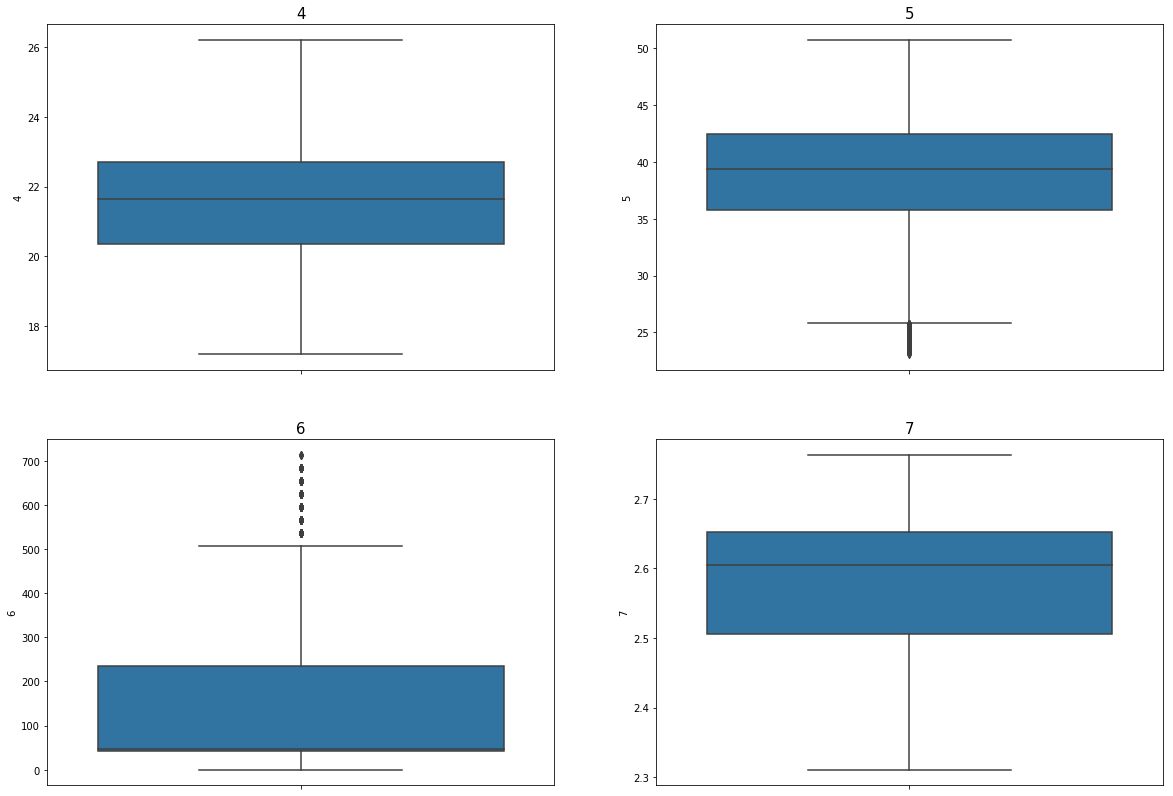

In [16]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex = True, figsize = (20, 14))

feature = ["4", "5", "6", "7"]; indx = 0
for i in [0, 1]:
    for j in [0, 1]:
        ax[i, j].set_title(feature[indx], fontsize = 15)
        p = sns.boxplot(y = feature[indx], data = data[:33963], ax = ax[i, j])
        indx += 1

In [4]:
# print(S1df.shape)
outliersIListaS1 = []
outliersIListaVS1 = []
for i, row in data[:43046].iterrows():
    if row[4] >=26.2 :
        outliersIListaS1.append(i)
        outliersIListaVS1.append(row[4])
print(len(outliersIListaS1))


9084


In [5]:
# Removendo outliers no S1
passo3S1= data.copy()
print(passo3S1.shape)
passo3S1= passo3S1.drop(passo3S1.index[outliersIListaS1])
print(passo3S1.shape)
passo3S1.to_csv('S1macc.csv')

(2313682, 8)
(2304598, 8)


In [3]:
data = pd.read_csv("S1macc.csv")
data.shape

(2304598, 9)

In [5]:
data.drop(['Unnamed: 0'], axis=1,inplace=True)
data.head(1)

,0,1,2,3,4,5,6,7
0,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.0933,45.08,2.69964


In [12]:
data.describe()

,2,3,4,5,6,7
count,33963.000000,33963.0,33963.000000,33963.000000,33963.000000,33963.000000
mean,29454.759591,1.0,21.619922,38.750255,144.083587,2.577924
std,18269.729972,0.0,1.873518,4.770157,169.114536,0.103467
min,3.000000,1.0,17.195400,23.051100,0.020110,2.310970
25%,13824.000000,1.0,20.341200,35.783900,41.400000,2.505990
50%,27651.000000,1.0,21.634800,39.348300,46.920000,2.604910
75%,43076.500000,1.0,22.712800,42.450900,235.520000,2.651430
max,65534.000000,1.0,26.191800,50.738700,713.920000,2.762420


In [9]:
data = data[:33963]
data.shape

(33963, 8)

In [6]:
for key,d in data[:33963].groupby('3'):
    print(key,"\n",d.head())
    print("--------------------------------")

1.0 
             0                1   2    3        4        5      6        7
0  2004-02-28   00:59:16.02785   3  1.0  19.9884  37.0933  45.08  2.69964
1  2004-02-28   01:03:16.33393  11  1.0  19.3024  38.4629  45.08  2.68742
2  2004-02-28  01:06:16.013453  17  1.0  19.1652  38.8039  45.08  2.68742
3  2004-02-28  01:06:46.778088  18  1.0  19.1750  38.8379  45.08  2.69964
4  2004-02-28  01:08:45.992524  22  1.0  19.1456  38.9401  45.08  2.68742
--------------------------------


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33963 entries, 0 to 33962
Data columns (total 8 columns):
0    33963 non-null object
1    33963 non-null object
2    33963 non-null int64
3    33963 non-null float64
4    33963 non-null float64
5    33963 non-null float64
6    33963 non-null float64
7    33963 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 2.1+ MB


In [21]:
# data.rename(columns = {'0':'date','1':'time','2':'epochId','3':'moteId','4':'temp','5':'humidity','6':'light','7':'voltage'},inplace=True)


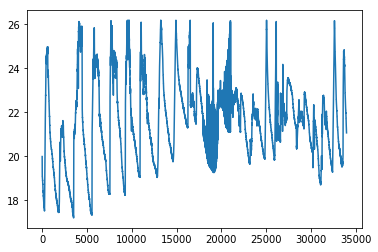

In [13]:
data[:33963]['4'].plot()

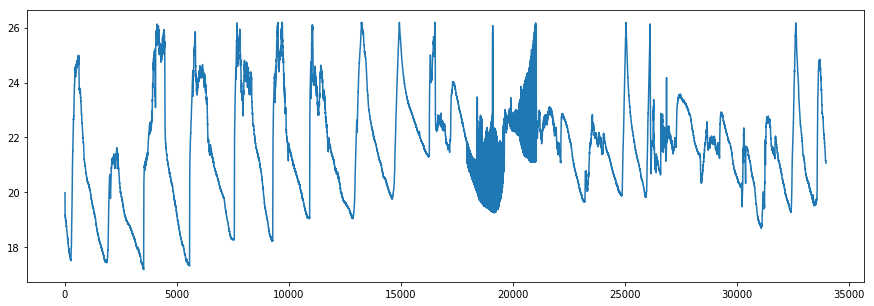

In [14]:
plt.figure(figsize = (15,5))
data[:33963]['4'].plot()

In [57]:
data.rename(columns = {0:'Unnamed: 0', 1:'date', 2:'time',3:'epochId',4:'moteId',5:'temp',6:'humidity',7:'light',8:'voltage'},inplace=True)

In [59]:
data.head()

,Unnamed: 0,date,time,epochId,moteId,temp,humidity,light,voltage
0,0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [27]:
data[:43047].groupby('3').mean().head()

,2,4,5,6,7
3,,,,,
1.0,29798.731387,22.037308,38.427469,157.554149,2.578168
2.0,5843.730936,20.583134,38.917314,192.189240,2.652668


In [7]:
for key, d in data[:33963].groupby('3'):
    break
    d.head()

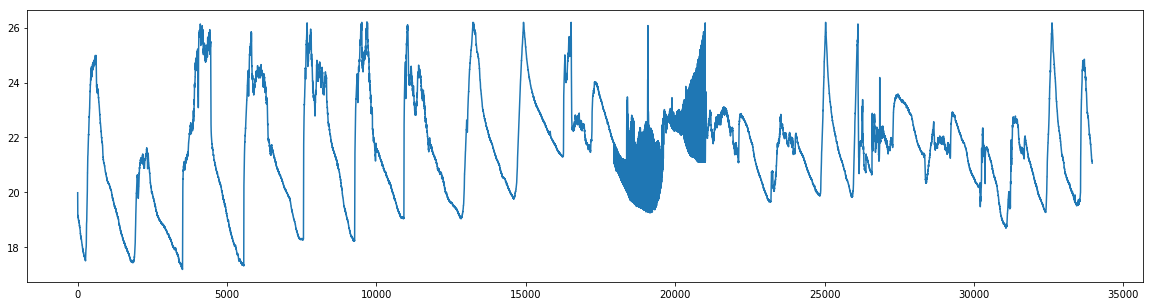

In [16]:
plt.figure(figsize = (20,5))
d['4'].plot()

In [26]:
d = d.sort_values(['0','1'],ascending = [1,1])

In [32]:
d.tail()

,0,1,2,3,4,5,6,7
22561,2004-03-23,03:57:59.014673,33004,1.0,37.0992,49.4845,1.84,2.28431
22562,2004-03-23,03:58:58.789999,33006,1.0,37.2266,49.4199,1.84,2.28431
22563,2004-03-23,04:00:36.975784,33009,1.0,37.1090,49.4199,2.30,2.28431
22564,2004-03-23,04:00:58.965221,33010,1.0,37.1384,49.4845,2.30,2.28431
22565,2004-03-23,04:02:12.457037,33012,1.0,37.1874,49.5490,2.30,2.28431


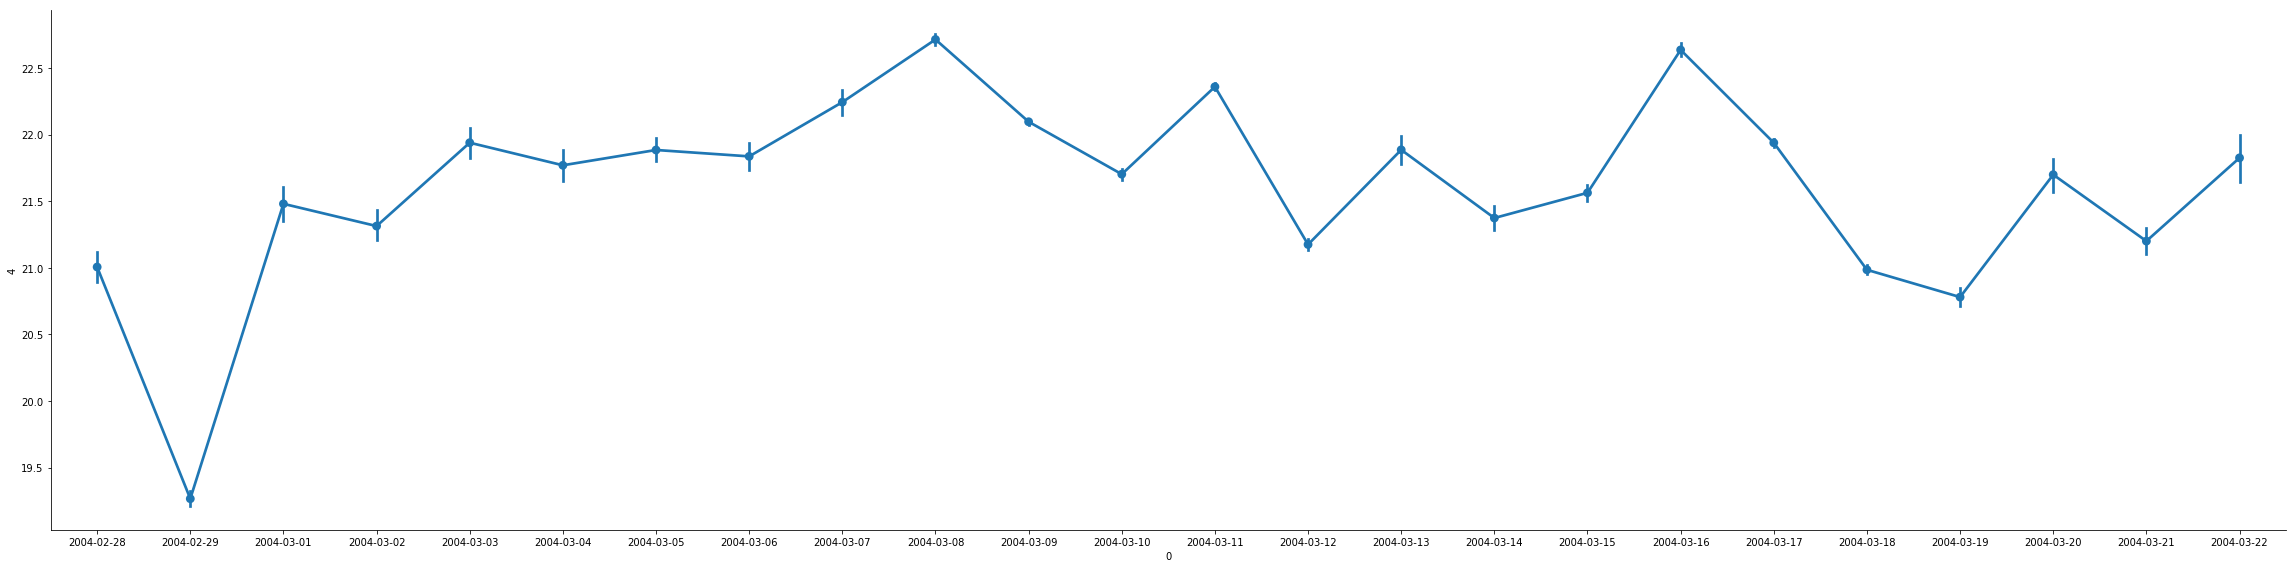

In [27]:
#plt.figure(figsize = (20,2))
sns.factorplot(x='0', y = '4', data = d, size = 8, aspect = 4)

In [34]:
data.dtypes

0     object
1     object
2      int64
3    float64
4    float64
5    float64
6    float64
7    float64
dtype: object

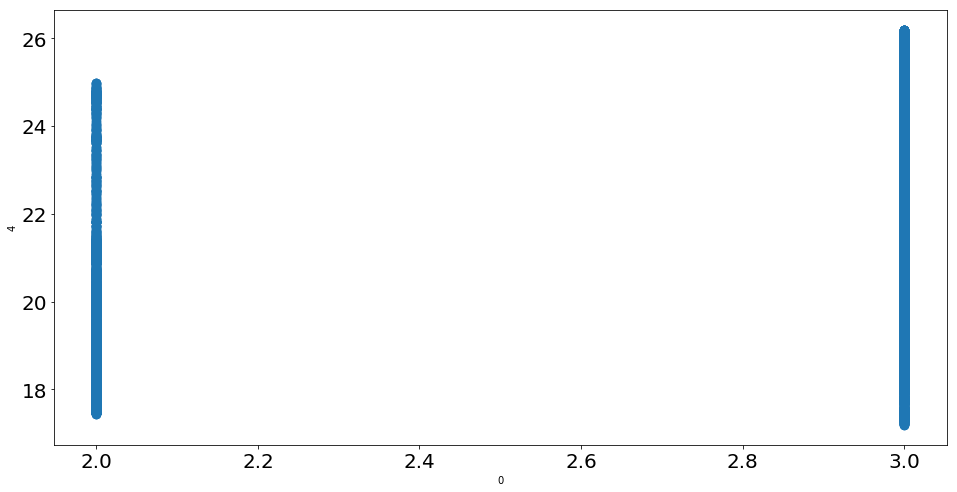

In [17]:
mon = data[:33963]['0']
temp= pd.DatetimeIndex(mon)
month = pd.Series(temp.month)
to_be_plotted  = data[:33963].drop(['0'], axis = 1)
to_be_plotted = to_be_plotted.join(month)
to_be_plotted.plot.scatter(x = '0', y = '4', figsize=(16,8), linewidth=5, fontsize=20)
plt.show()

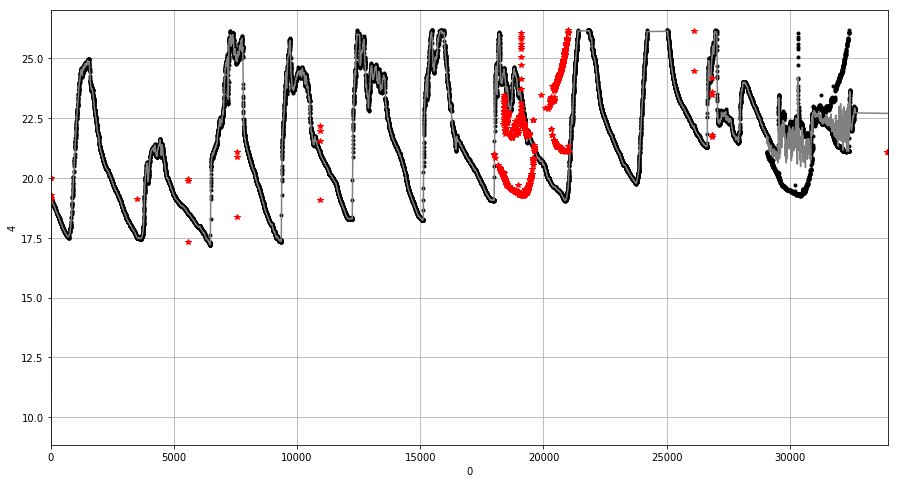

In [8]:
from itertools import count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
#style.use('fivethirtyeight')
%matplotlib inline
def moving_average(data, window_size):

    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')


def explain_anomalies(y, window_size, sigma=1.0):

    avg = moving_average(y, window_size).tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    std = np.std(residual)
    return {'standard_deviation': round(std, 2),
            'anomalies_dict': collections.OrderedDict([(index, y_i) for
                                                       index, y_i, avg_i in zip(count(), y, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}


def explain_anomalies_rolling_std(y, window_size, sigma=1.0):
    """ Helps in exploring the anamolies using rolling standard deviation
    Args:
    -----
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma (int): value for standard deviation

    Returns:
    --------
        a dict (dict of 'standard_deviation': int, 'anomalies_dict': (index: value))
        containing information about the points indentified as anomalies
    """
    avg = moving_average(y, window_size)
    avg_list = avg.tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    testing_std = pd.rolling_std(residual, window_size)
    testing_std_as_df = pd.DataFrame(testing_std)
    rolling_std = testing_std_as_df.replace(np.nan,
                                  testing_std_as_df.ix[window_size - 1]).round(3).iloc[:,0].tolist()
    std = np.std(residual)
    return {'stationary standard_deviation': round(std, 3),
            'anomalies_dict': collections.OrderedDict([(index, y_i)
                                                       for index, y_i, avg_i, rs_i in izip(count(),
                                                                                           y, avg_list, rolling_std)
              if (y_i > avg_i + (sigma * rs_i)) | (y_i < avg_i - (sigma * rs_i))])}


# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies.
        Supports both moving and stationary standard deviation. Use the 'applying_rolling_std' to switch
        between the two.
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
    """
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='gray')
    plt.xlim(0, 33963)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    if applying_rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
    plt.plot(x_anomaly, y_anomaly, "r*")
    #print(x_anomaly)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()

# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results2(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies.
        Supports both moving and stationary standard deviation. Use the 'applying_rolling_std' to switch
        between the two.
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
    """
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='gray')
    plt.xlim(0, 33963)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    if applying_rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, )
    #print(x_anomaly)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()


# 4. Lets play with the functions
x = d[:33963]['2']
Y = d[:33963]['4']

# plot the results
plot_results(x, y=Y, window_size=10, text_xlabel="0", sigma_value=2,text_ylabel="4")
#events = explain_anomalies(y=Y, window_size=5, sigma=3)

# Display the anomaly dict
#print("Information about the anomalies model:{}".format(events))


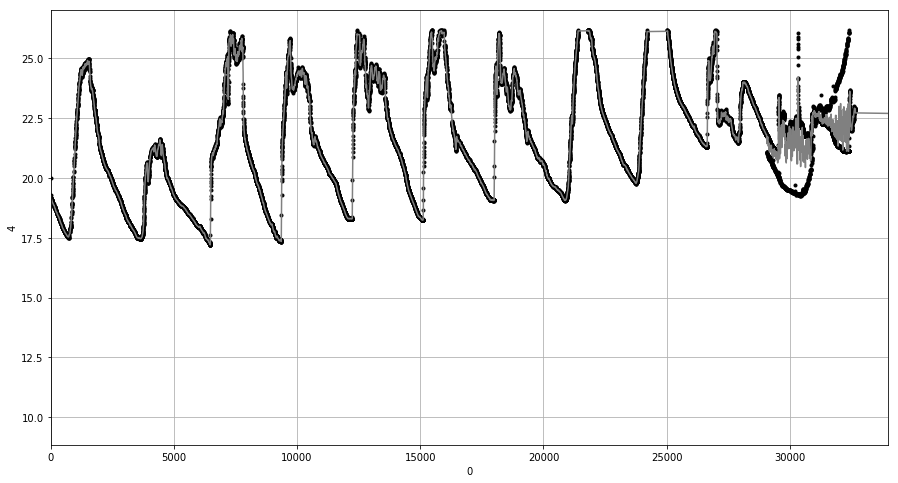

In [9]:

# 4. Lets play with the functions
x = d[:33963]['2']
Y = d[:33963]['4']

# plot the results
plot_results2(x, y=Y, window_size=10, text_xlabel="0", sigma_value=2,text_ylabel="4")
# events = explain_anomalies(y=Y, window_size=10, sigma=2)

# Display the anomaly dict
# print("Information about the anomalies model:{}".format(events))


In [10]:
def final_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    y_av = moving_average(y, window_size)

    # Query for the anomalies and plot the same
    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     print(len(x_anomaly), x_anomaly)
    print(len(x_anomaly))
    return x_anomaly

# 4. Lets play with the functions
x = d[:33963]['2']
Y = d[:33963]['4']
# Pegando os índices dos outliers e removendo do dataset final
outliersIndices = final_results(x, y=Y, window_size=10, text_xlabel="2", sigma_value=2,text_ylabel="4")
outliersIndices

1168


array([    0,     1,     2, ..., 33960, 33961, 33962])

In [11]:
## Checando e removendo outliers no step 3.
passoO= d[:33963].copy()
print(passoO.shape)
passoO= passoO.drop(passoO.index[outliersIndices])
print(passoO.shape)

(33963, 8)
(32795, 8)


195


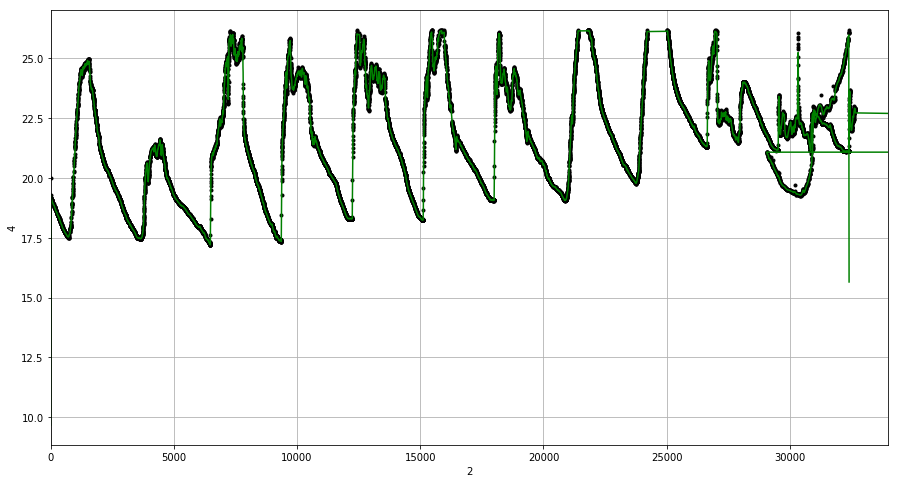

In [320]:
def plot_resultsFinal(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies.
        Supports both moving and stationary standard deviation. Use the 'applying_rolling_std' to switch
        between the two.
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
    """
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 10000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, "r*")
# #     print(len(x_anomaly), x_anomaly)
    print(len(x_anomaly))

    
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()  
def plot_resultsAOR(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies.
        Supports both moving and stationary standard deviation. Use the 'applying_rolling_std' to switch
        between the two.
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
    """
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 33963)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, "r*")
# #     print(len(x_anomaly), x_anomaly)
    print(len(x_anomaly))

    
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()   
# Step 3 COmplete Antes de remover outliers

xF = d[:33963]['2']
YF = d[:33963]['4']

# plot residual
plot_resultsAOR(xF, y=YF, window_size=10, text_xlabel="2", sigma_value=2,text_ylabel="4")

3575


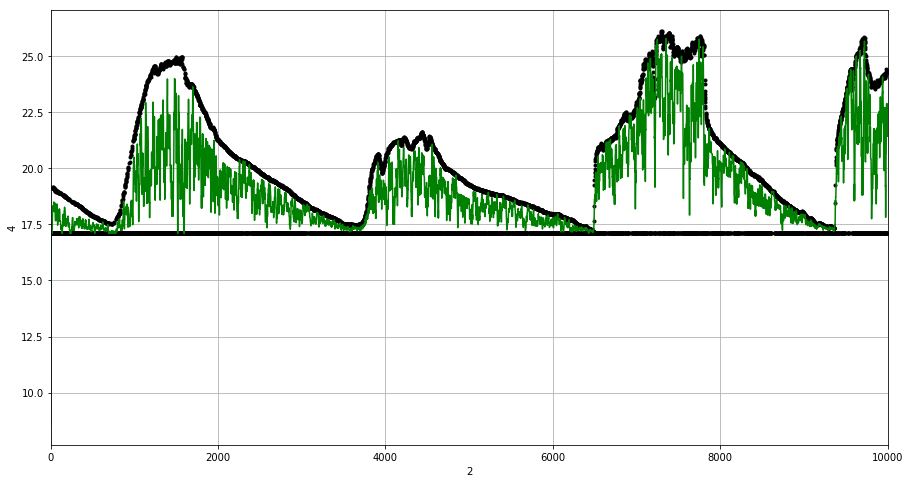

In [382]:
# Final reconstrução
xF = teste['2']
YF = teste['4']

# plot final rec
plot_resultsFinal(xF, y=YF, window_size=10, text_xlabel="2", sigma_value=2,text_ylabel="4")

# Estatísticas Simples

In [300]:
dplot[dplot['Moteid']==1].shape

(43047, 8)

In [301]:
# Passo 1
myDicInit = {
    'Data type':['Raw Data'],
    'size':[43047],
    'mean':dplot[:43047]['Temperature'].mean(),
    'SD':dplot[:43047]['Temperature'].std(), 
    'median':dplot[:43047]['Temperature'].median(),
    'MAD':dplot[:43047]['Temperature'].mad()  
}

df0 = pd.DataFrame(myDicInit)
df0.head()


,Data type,size,mean,SD,median,MAD
0,Raw Data,43047,35.882437,33.655123,22.1444,23.397582


In [13]:

# Passo 1

myDic = {
    'Data type':['Raw Data'],
    'size':[33963],
    'mean':d[:33963]['4'].mean(),
    'SD':d[:33963]['4'].std(), 
    'median':d[:33963]['4'].median(),
    'MAD':d[:33963]['4'].mad()  
}

df = pd.DataFrame(myDic)
df.head()


,Data type,size,mean,SD,median,MAD
0,Raw Data,33963,21.619922,1.873518,21.6348,1.471464


In [22]:
# Passo 2

myDicResidualRemoved = {
    'Data type':['step 2 (AOR'],
    'size':[passoO.shape[0]],
    'mean':passoO['4'].mean(),
    'SD':passoO['4'].std(), 
    'median':passoO['4'].median(),
    'MAD':passoO['4'].mad()  
}

dfResAOR = pd.DataFrame(myDicResidualRemoved)
print(passoO.shape[0])
dfResAOR.head()

32795


,Data type,size,mean,SD,median,MAD
0,step 2 (AOR,32795,21.621043,1.880624,21.6446,1.477494


In [383]:
# Passo 3

myDicFinalImputation = {
    'Data type':['step 3'],
    'size':[teste.shape[0]],
    'mean':teste['4'].mean(),
    'SD':teste['4'].std(), 
    'median':teste['4'].median(),
    'MAD':teste['4'].mad()  
}

dfFinalI = pd.DataFrame(myDicFinalImputation)
print(teste.shape[0])
dfFinalI.head()

65536


,Data type,size,mean,SD,median,MAD
0,step 3,65536,19.355837,2.62225,17.1,2.365429


In [292]:
np.min(teste['4']),np.max(teste['4'])

(17.100000000000616, 26.1918)

In [384]:
print( df0.head() )
print( df.head() )
print( dfResAOR.head() )
print( dfFinalI.head() )


  Data type   size       mean         SD   median        MAD
0  Raw Data  43047  35.882437  33.655123  22.1444  23.397582
  Data type   size       mean        SD   median       MAD
0  Raw Data  33963  21.619922  1.873518  21.6348  1.471464
     Data type   size       mean        SD   median       MAD
0  step 2 (AOR  32795  21.621043  1.880624  21.6446  1.477494
  Data type   size       mean       SD  median       MAD
0    step 3  65536  19.355837  2.62225    17.1  2.365429


In [388]:
# 21.621043 - 19.355837,1.880624 - 2.62225, 21.6446-17.1, 1.477494- 2.365429

(2.265205999999999,
 -0.7416260000000001,
 4.544599999999999,
 -0.8879349999999997)

In [30]:
indiceImput = []
for i in range(65536):
    indiceImput.append(i)
np.max(indiceImput)

65535

In [80]:
passoOEp = passoO['2'].tolist()
len(passoOEp)

32795

In [107]:
idInputEq = set(indiceImput)
idInputNEq = set(passoOEp)
resultIntersecEp = list( idInputEq - idInputNEq )

print(len(resultIntersecEp)) # {4, 6, 10}

print(len(idInputEq), len(idInputNEq))
# print('min max ',np.min(idInputEq), np.max(idInputNEq) )    

32828
65536 32708


In [141]:
# Create a time series of 2000 elements, one very five minutes starting on 1/1/2000
time = pd.date_range('2004-02-28', periods=65536, freq='31s')

# Create a pandas series with a random values between 0 and 100, using 'time' as the index
series = pd.Series(np.random.randint(100, size=65536), index=time)
# View the first few rows of the data
series[0:3]

2004-02-28 00:00:00    91
2004-02-28 00:00:31    98
2004-02-28 00:01:02    39
Freq: 31S, dtype: int32

In [182]:
# dfHora = series.to
dfHora  =pd.DataFrame(series, columns=['1'])
dfHora.head(1)

,1
2004-02-28,91


In [198]:
listofzeros = [0] * 32828
myDicNewdf2 = {
    '0':data[:32828]['0'],
    '1':data[:32828]['1'],#data[:32828]['1']
    '2':resultIntersecEp[:32828],
    '3':data[:32828]['3'], 
    '4':listofzeros,
    '5':data[:32828]['5'],
    '6':data[:32828]['6'],
    '7':data[:32828]['7']  
}

dfOut = pd.DataFrame(myDicNewdf2)
print(dfOut.shape[0])
dfOut.to_csv('csvAllOutliers.csv', index=False)
dfOut.tail(10)


32828


,0,1,2,3,4,5,6,7
32818,2004-03-20,20:03:52.763086,65526,1.0,0,40.1622,1.84,2.40453
32819,2004-03-20,20:04:22.946618,65527,1.0,0,40.2299,1.84,2.41431
32820,2004-03-20,20:05:01.691561,65528,1.0,0,40.5004,1.84,2.41431
32821,2004-03-20,20:06:08.040158,65529,1.0,0,40.1284,1.84,2.40453
32822,2004-03-20,20:09:56.800488,65530,1.0,0,40.5680,1.84,2.40453
32823,2004-03-20,20:11:35.439112,65531,1.0,0,40.2299,2.30,2.40453
32824,2004-03-20,20:11:58.467115,65532,1.0,0,40.3652,2.30,2.40453
32825,2004-03-20,20:12:24.093427,65533,1.0,0,40.2299,2.30,2.40453
32826,2004-03-20,20:14:36.685415,65534,1.0,0,40.6693,2.30,2.40453
32827,2004-03-20,20:15:05.273569,65535,1.0,0,40.7031,2.30,2.40453


In [262]:
dfFinalStep.head()

,0,1,2,3,4,5,6,7
0,2004-02-28,00:59:16.02785,0,1.0,0.0,37.0933,45.08,2.69964
1,2004-02-28,01:03:16.33393,1,1.0,0.0,38.4629,45.08,2.68742
2,2004-02-28,01:06:16.013453,2,1.0,0.0,38.8039,45.08,2.68742
3,2004-02-28,01:06:46.778088,3,1.0,0.0,38.8379,45.08,2.69964
4,2004-02-28,01:08:45.992524,4,1.0,0.0,38.9401,45.08,2.68742


In [283]:
 
dfFinalStep = pd.concat([dfOut,passoO], sort='2', axis=0)
dfFinalStep.sort_values(by = '2', inplace = True)

# dfFinalStep.set_index('2', inplace=True)
print(dfFinalStep.shape)

dfFinalStep.head(25)


(65623, 8)


,0,1,2,3,4,5,6,7
0,2004-02-28,00:59:16.02785,0,1.0,0.0000,37.0933,45.08,2.69964
1,2004-02-28,01:03:16.33393,1,1.0,0.0000,38.4629,45.08,2.68742
2,2004-02-28,01:06:16.013453,2,1.0,0.0000,38.8039,45.08,2.68742
3,2004-02-28,01:06:46.778088,3,1.0,0.0000,38.8379,45.08,2.69964
4,2004-02-28,01:08:45.992524,4,1.0,0.0000,38.9401,45.08,2.68742
5,2004-02-28,01:09:22.323858,5,1.0,0.0000,38.8720,45.08,2.68742
6,2004-02-28,01:09:46.109598,6,1.0,0.0000,38.8039,45.08,2.68742
7,2004-02-28,01:10:16.6789,7,1.0,0.0000,38.8379,45.08,2.69964
8,2004-02-28,01:10:46.250524,8,1.0,0.0000,38.8720,45.08,2.68742
9,2004-02-28,01:11:46.941288,9,1.0,0.0000,38.9401,45.08,2.69964


In [276]:
dfOut.head()

,0,1,2,3,4,5,6,7
0,2004-02-28,00:59:16.02785,0,1.0,0,37.0933,45.08,2.69964
1,2004-02-28,01:03:16.33393,1,1.0,0,38.4629,45.08,2.68742
2,2004-02-28,01:06:16.013453,2,1.0,0,38.8039,45.08,2.68742
3,2004-02-28,01:06:46.778088,3,1.0,0,38.8379,45.08,2.69964
4,2004-02-28,01:08:45.992524,4,1.0,0,38.9401,45.08,2.68742


In [277]:
passoO.head()

,0,1,2,3,4,5,6,7
5,2004-02-28,01:09:22.323858,23,1.0,19.1652,38.8720,45.08,2.68742
6,2004-02-28,01:09:46.109598,24,1.0,19.1652,38.8039,45.08,2.68742
7,2004-02-28,01:10:16.6789,25,1.0,19.1456,38.8379,45.08,2.69964
8,2004-02-28,01:10:46.250524,26,1.0,19.1456,38.8720,45.08,2.68742
9,2004-02-28,01:11:46.941288,28,1.0,19.1456,38.9401,45.08,2.69964


In [284]:
# 65536-65623
dfFinalStep.to_csv('dfImputation.csv', index=False)

In [381]:
final= pd.read_csv('finalS1.csv')
teste = final.drop_duplicates(subset=['2'],keep='first', inplace=False)
teste.shape, dfFinalStep.shape


((65536, 9), (65623, 8))

In [245]:
print(passoO.head())
for i, row in passoO.iterrows():
    if row['2'] == 23:
        print('s ',i)
    break

            0                1   2    3        4        5      6        7
5  2004-02-28  01:09:22.323858  23  1.0  19.1652  38.8720  45.08  2.68742
6  2004-02-28  01:09:46.109598  24  1.0  19.1652  38.8039  45.08  2.68742
7  2004-02-28    01:10:16.6789  25  1.0  19.1456  38.8379  45.08  2.69964
8  2004-02-28  01:10:46.250524  26  1.0  19.1456  38.8720  45.08  2.68742
9  2004-02-28  01:11:46.941288  28  1.0  19.1456  38.9401  45.08  2.69964
s  5


In [205]:
# dfFinal = 
data[data['3']==1].shape[0], passoO.shape, dfOut.shape, ( dfOut.shape[0]  +passoO.shape[0])

(33963, (32795, 8), (32828, 8), 65623)

In [24]:
passoO.head(10)

,0,1,2,3,4,5,6,7
5,2004-02-28,01:09:22.323858,23,1.0,19.1652,38.8720,45.08,2.68742
6,2004-02-28,01:09:46.109598,24,1.0,19.1652,38.8039,45.08,2.68742
7,2004-02-28,01:10:16.6789,25,1.0,19.1456,38.8379,45.08,2.69964
8,2004-02-28,01:10:46.250524,26,1.0,19.1456,38.8720,45.08,2.68742
9,2004-02-28,01:11:46.941288,28,1.0,19.1456,38.9401,45.08,2.69964
10,2004-02-28,01:12:46.251377,30,1.0,19.1358,38.9061,45.08,2.68742
11,2004-02-28,01:14:16.63127,33,1.0,19.1162,38.8039,45.08,2.69964
12,2004-02-28,01:14:46.569352,34,1.0,19.1162,38.8720,45.08,2.69964
13,2004-02-28,01:15:16.649556,35,1.0,19.1064,39.0082,45.08,2.69964
14,2004-02-28,01:16:16.343708,37,1.0,19.1064,38.8720,43.24,2.69964


# STATISTICAL METHOD OF ANOMALY DETECTION

In [19]:
d['2'].value_counts().head()

31528    2
32362    2
30257    2
32025    2
29860    2
Name: 2, dtype: int64

In [20]:
len(d)

33963

In [21]:
d.to_csv('sensor1Result.csv')

In [18]:
d1 = d
d1.head()

,0,1,2,3,4,5,6,7
0,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.0933,45.08,2.69964
1,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.4629,45.08,2.68742
2,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.8039,45.08,2.68742
3,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.8379,45.08,2.69964
4,2004-02-28,01:08:45.992524,22,1.0,19.1456,38.9401,45.08,2.68742


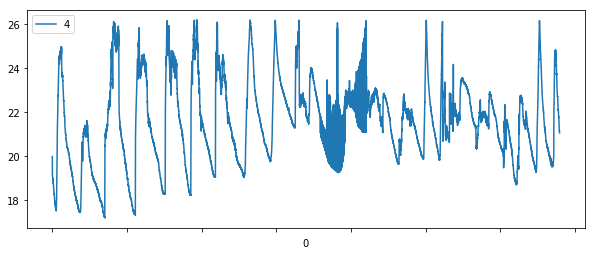

In [23]:
#style.use('presentation')
d1.plot(x='0',y='4',figsize=(10,4))

In [19]:
d1.sort_values(['0','1'],inplace=True)
d1.head()

,0,1,2,3,4,5,6,7
0,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.0933,45.08,2.69964
1,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.4629,45.08,2.68742
2,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.8039,45.08,2.68742
3,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.8379,45.08,2.69964
4,2004-02-28,01:08:45.992524,22,1.0,19.1456,38.9401,45.08,2.68742


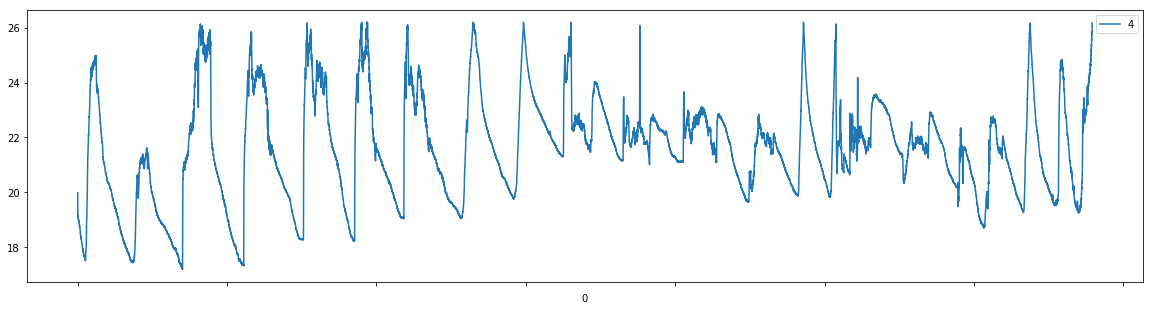

In [20]:
d1.plot(x='0',y='4', figsize = (20,5))

In [27]:
d1_mean= d1.groupby('0').mean()
d1_mean.head(), 

(                       2    3          4          5           6         7
 0                                                                        
 2004-02-28   1551.436598  1.0  21.005487  35.888716  175.619408  2.710136
 2004-02-29   4214.469329  1.0  19.265746  40.893386  125.813194  2.679212
 2004-03-01   7155.139511  1.0  21.479933  39.530966   81.299073  2.690446
 2004-03-02   9964.670817  1.0  21.312893  33.615198  133.280189  2.678355
 2004-03-03  12817.416252  1.0  21.938833  30.209357  105.006125  2.673348,)

In [28]:
d1_std = d1.groupby('0').std()
d1_std.head()

,2,3,4,5,6,7
0,,,,,,
2004-02-28,780.969783,0.0,2.245717,3.301782,172.369460,0.023389
2004-02-29,842.631477,0.0,1.221135,1.670802,120.106823,0.012735
2004-03-01,803.831312,0.0,2.797209,3.801637,60.402729,0.029906
2004-03-02,835.666751,0.0,2.520810,5.363023,148.874286,0.025022
2004-03-03,849.002352,0.0,2.396967,3.299303,128.121795,0.024358


In [29]:
d2 = pd.merge(d1,d1_std,left_on = '0',right_index = True)
d2

,0,1,2_x,3_x,4_x,5_x,6_x,7_x,2_y,3_y,4_y,5_y,6_y,7_y
0,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.0933,45.08,2.69964,780.969783,0.0,2.245717,3.301782,172.369460,0.023389
1,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.4629,45.08,2.68742,780.969783,0.0,2.245717,3.301782,172.369460,0.023389
2,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.8039,45.08,2.68742,780.969783,0.0,2.245717,3.301782,172.369460,0.023389
3,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.8379,45.08,2.69964,780.969783,0.0,2.245717,3.301782,172.369460,0.023389
4,2004-02-28,01:08:45.992524,22,1.0,19.1456,38.9401,45.08,2.68742,780.969783,0.0,2.245717,3.301782,172.369460,0.023389
5,2004-02-28,01:09:22.323858,23,1.0,19.1652,38.8720,45.08,2.68742,780.969783,0.0,2.245717,3.301782,172.369460,0.023389
6,2004-02-28,01:09:46.109598,24,1.0,19.1652,38.8039,45.08,2.68742,780.969783,0.0,2.245717,3.301782,172.369460,0.023389
7,2004-02-28,01:10:16.6789,25,1.0,19.1456,38.8379,45.08,2.69964,780.969783,0.0,2.245717,3.301782,172.369460,0.023389
8,2004-02-28,01:10:46.250524,26,1.0,19.1456,38.8720,45.08,2.68742,780.969783,0.0,2.245717,3.301782,172.369460,0.023389
9,2004-02-28,01:11:46.941288,28,1.0,19.1456,38.9401,45.08,2.69964,780.969783,0.0,2.245717,3.301782,172.369460,0.023389


In [30]:
# d2.drop(['epochId_x','moteId_x','humidity_x','light_x', 'voltage_x','epochId_y','moteId_y','humidity_y','light_y', 'voltage_y'],axis = 1,inplace=True)
# d2.head()
d2.drop(['2_x','3_x','7_x','5_x', '6_x','2_y','3_y','7_y','5_y', '6_y'],axis = 1,inplace=True)
d2.head()

,0,1,4_x,4_y
0,2004-02-28,00:59:16.02785,19.9884,2.245717
1,2004-02-28,01:03:16.33393,19.3024,2.245717
2,2004-02-28,01:06:16.013453,19.1652,2.245717
3,2004-02-28,01:06:46.778088,19.1750,2.245717
4,2004-02-28,01:08:45.992524,19.1456,2.245717


In [31]:
d2 = pd.merge(d2,d1_mean,left_on = '0',right_index = True)
d2.head()

,0,1,4_x,4_y,2,3,4,5,6,7
0,2004-02-28,00:59:16.02785,19.9884,2.245717,1551.436598,1.0,21.005487,35.888716,175.619408,2.710136
1,2004-02-28,01:03:16.33393,19.3024,2.245717,1551.436598,1.0,21.005487,35.888716,175.619408,2.710136
2,2004-02-28,01:06:16.013453,19.1652,2.245717,1551.436598,1.0,21.005487,35.888716,175.619408,2.710136
3,2004-02-28,01:06:46.778088,19.1750,2.245717,1551.436598,1.0,21.005487,35.888716,175.619408,2.710136
4,2004-02-28,01:08:45.992524,19.1456,2.245717,1551.436598,1.0,21.005487,35.888716,175.619408,2.710136


In [32]:
d2.drop(['2','3','5','6', '7'],axis = 1,inplace=True)
d2.rename(columns={'4_x':'temp','4_y':'std','4':'mean'},inplace=True)
d2.head()

,0,1,temp,std,mean
0,2004-02-28,00:59:16.02785,19.9884,2.245717,21.005487
1,2004-02-28,01:03:16.33393,19.3024,2.245717,21.005487
2,2004-02-28,01:06:16.013453,19.1652,2.245717,21.005487
3,2004-02-28,01:06:46.778088,19.1750,2.245717,21.005487
4,2004-02-28,01:08:45.992524,19.1456,2.245717,21.005487


In [33]:
def outlier(row):
    x = row['temp']
    m = row['mean']
    s = row['std']
    #print(x,m,s)
    if x < (m+3*s) and x > (m-3*s):
        return 0
    else :
        return 1

d2['outlier']=d2.apply(outlier, axis = 1)
d2.tail()

,0,1,temp,std,mean,outlier
20993,2004-03-22,22:50:03.430039,26.0644,2.174083,21.824963,0
20996,2004-03-22,22:51:28.804247,26.0448,2.174083,21.824963,0
20999,2004-03-22,22:52:59.519945,26.0448,2.174083,21.824963,0
21002,2004-03-22,22:54:10.628123,26.1134,2.174083,21.824963,0
21007,2004-03-22,22:56:40.912517,26.1722,2.174083,21.824963,0


In [34]:
d1['outlier']=d2['outlier']
d1.tail()

,0,1,2,3,4,5,6,7,outlier
20993,2004-03-22,22:50:03.430039,32388,1.0,26.0644,48.5464,53.36,2.31097,0
20996,2004-03-22,22:51:28.804247,32391,1.0,26.0448,48.6112,53.36,2.31097,0
20999,2004-03-22,22:52:59.519945,32394,1.0,26.0448,48.5788,53.36,2.31097,0
21002,2004-03-22,22:54:10.628123,32396,1.0,26.1134,48.6112,53.36,2.31097,0
21007,2004-03-22,22:56:40.912517,32401,1.0,26.1722,48.4490,53.36,2.31097,0


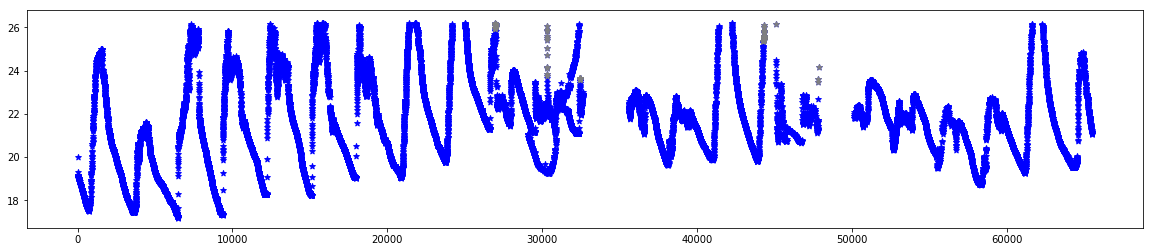

In [35]:
outlier = d1[d1['outlier']==1]
plt.figure(figsize = (20,4))
plt.scatter(d1['2'],d1['4'],color = 'blue', marker = '*')
plt.scatter(outlier['2'],outlier['4'],color = 'gray',marker='*')

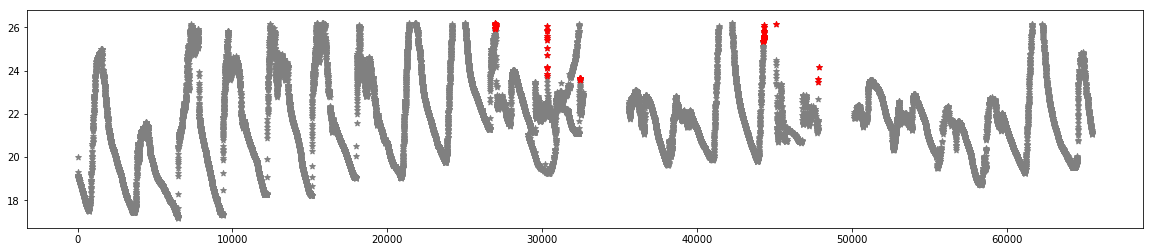

In [40]:
outlier = d1[d1['outlier']==1]
plt.figure(figsize = (20,4))
plt.scatter(d1['2'],d1['4'],color = 'gray', marker = '*')
plt.scatter(outlier['2'],outlier['4'],color = 'red',marker='*')

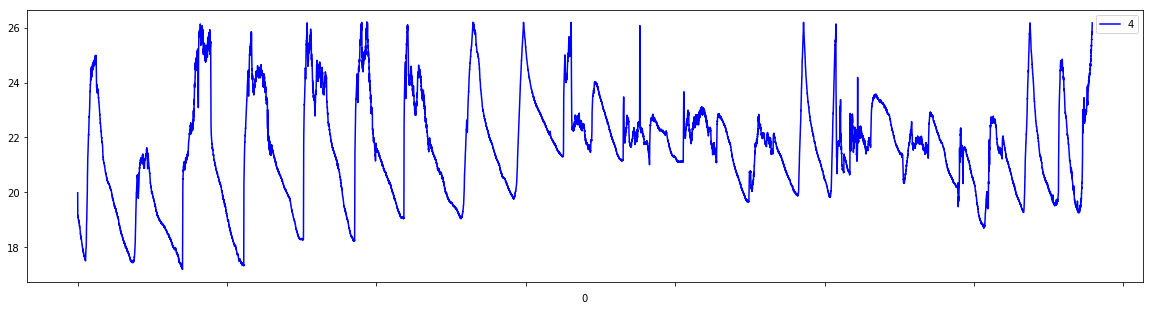

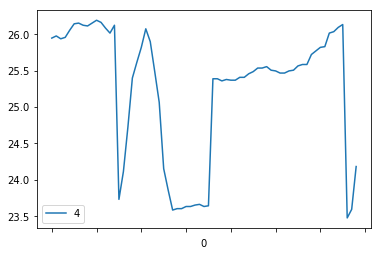

In [41]:
color= ['red' if i == 1 else 'blue' for i in d1.outlier]
d1.plot(x='0',y='4', color = color,figsize = (20,5))
d1[d1.outlier==1].plot(x = '0', y = '4')

In [42]:
count_df=d1.groupby('0').count()
#count_df.drop(['epochId','moteId','humidity','light','voltage'],axis = 1,inplace=True)
count_df = count_df['1']
count_df = df(count_df)
count_df.rename(columns =  {'1':'count'},inplace=True)
count_df.head()

,count
0,
2004-02-28,1317
2004-02-29,1728
2004-03-01,1921
2004-03-02,2008
2004-03-03,1809


In [46]:
d2 = pd.merge(d2,count_df, left_on = '0', right_index = True)
d2.tail()

,0,1,temp,std,mean,outlier,count_x,z_value,count_y
20993,2004-03-22,22:50:03.430039,26.0644,2.174083,21.824963,0,596,1.949989,596
20996,2004-03-22,22:51:28.804247,26.0448,2.174083,21.824963,0,596,1.940973,596
20999,2004-03-22,22:52:59.519945,26.0448,2.174083,21.824963,0,596,1.940973,596
21002,2004-03-22,22:54:10.628123,26.1134,2.174083,21.824963,0,596,1.972527,596
21007,2004-03-22,22:56:40.912517,26.1722,2.174083,21.824963,0,596,1.999573,596


In [44]:
d2['z_value'] = (d2['temp']-d2['mean'])/d2['std']
d2.head()

,0,1,temp,std,mean,outlier,count,z_value
0,2004-02-28,00:59:16.02785,19.9884,2.245717,21.005487,0,1317,-0.452901
1,2004-02-28,01:03:16.33393,19.3024,2.245717,21.005487,0,1317,-0.758371
2,2004-02-28,01:06:16.013453,19.1652,2.245717,21.005487,0,1317,-0.819465
3,2004-02-28,01:06:46.778088,19.1750,2.245717,21.005487,0,1317,-0.815101
4,2004-02-28,01:08:45.992524,19.1456,2.245717,21.005487,0,1317,-0.828193


In [47]:
d2.outlier.value_counts()

0    33894
1       69
Name: outlier, dtype: int64